# Software Engineering for Data Scientists

## *Manipulating Data with Python*
## CSE 583

## Today's Objectives

#### 1. Opening & Navigating the Jupyter Notebook

#### 2. Simple Math in the Jupyter Notebook

#### 3. Loading data with ``pandas``

#### 4. Cleaning and Manipulating data with ``pandas``

#### 5. Visualizing data with ``pandas`` & ``matplotlib``

## 1. Opening and Navigating the IPython Notebook

We will start today with the interactive environment that we will be using often through the course: the [Jupyter Notebook](http://jupyter.org).

We will walk through the following steps together:

1. Download [miniconda](https://conda.io/miniconda.html) (be sure to get Version 3.6) and install it on your system (hopefully you have done this before coming to class)
   ```
   ```

2. Use the ``conda`` command-line tool to update your package listing and install the IPython notebook:

   Update ``conda``'s listing of packages for your system:
   ```
   $ conda update conda
   ```
   
   Install IPython notebook and all its requirements
   ```
   $ conda install jupyter notebook
   ```
   
3. Navigate to the directory containing the course material. For example:

   ```
   $ cd ~/courses/CSE583/
   ```
   
   You should see a number of files in the directory, including these:
   
   ```
   $ ls
   ...
   Breakout-Simple-Math.ipynb
   Lecture-Python-And-Data.ipynb
   ...
   ```

4. Type ``jupyter notebook`` in the terminal to start the notebook

   ```
   $ jupyter notebook
   ```
   
   If everything has worked correctly, it should automatically launch your default browser
   ```
   ```
   
5. Click on ``Lecture-Python-And-Data.ipynb`` to open the notebook containing the content for this lecture.

With that, you're set up to use the Jupyter notebook!

## 2. Simple Math in the Jupyter Notebook

Now that we have the Jupyter notebook up and running, we're going to do a short breakout exploring some of the mathematical functionality that Python offers.

Please open [Breakout-Simple-Math.ipynb](Breakout-Simple-Math.ipynb), find a partner, and make your way through that notebook, typing and executing code along the way.

## 3. Loading data with ``pandas``

With this simple Python computation experience under our belt, we can now move to doing some more interesting analysis.

### Python's Data Science Ecosystem

In addition to Python's built-in modules like the ``math`` module we explored above, there are also many often-used third-party modules that are core tools for doing data science with Python.
Some of the most important ones are:

#### [``numpy``](http://numpy.org/): Numerical Python

Numpy is short for "Numerical Python", and contains tools for efficient manipulation of arrays of data.
If you have used other computational tools like IDL or MatLab, Numpy should feel very familiar.

#### [``scipy``](http://scipy.org/): Scientific Python

Scipy is short for "Scientific Python", and contains a wide range of functionality for accomplishing common scientific tasks, such as optimization/minimization, numerical integration, interpolation, and much more.
We will not look closely at Scipy today, but we will use its functionality later in the course.

#### [``pandas``](http://pandas.pydata.org/): Labeled Data Manipulation in Python

Pandas is short for "Panel Data", and contains tools for doing more advanced manipulation of labeled data in Python, in particular with a columnar data structure called a *Data Frame*.
If you've used the [R](http://rstats.org) statistical language (and in particular the so-called "Hadley Stack"), much of the functionality in Pandas should feel very familiar.

#### [``matplotlib``](http://matplotlib.org): Visualization in Python

Matplotlib started out as a Matlab plotting clone in Python, and has grown from there in the 15 years since its creation. It is the most popular data visualization tool currently in the Python data world (though other recent packages are starting to encroach on its monopoly).

### Installing Pandas & friends

Because the above packages are not included in Python itself, you need to install them separately. While it is possible to install these from source (compiling the C and/or Fortran code that does the heavy lifting under the hood) it is much easier to use a package manager like ``conda``. All it takes is to run

```
$ conda install numpy scipy pandas matplotlib
```

and (so long as your conda setup is working) the packages will be downloaded and installed on your system.

### Downloading the data

shell commands can be run from the notebook by preceding them with an exclamation point:

In [1]:
!ls

Breakout-Simple-Math-Completed.ipynb    pronto-new.csv
Breakout-Simple-Math.ipynb              pronto.csv
Lecture-Python-And-Data-Completed.ipynb split_apply_combine.png
Lecture-Python-And-Data.ipynb


uncomment this to download the data:

In [2]:
# !curl -o pronto.csv https://data.seattle.gov/api/views/tw7j-dfaw/rows.csv?accessType=DOWNLOAD

### Loading Data with Pandas

In [3]:
import pandas

Because we'll use it so much, we often import under a shortened name using the ``import ... as ...`` pattern:

In [4]:
import pandas as pd

Now we can use the ``read_csv`` command to read the comma-separated-value data:

In [5]:
data = pd.read_csv('pronto.csv')

*Note: strings in Python can be defined either with double quotes or single quotes*

### Viewing Pandas Dataframes

The ``head()`` and ``tail()`` methods show us the first and last rows of the data

In [6]:
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [7]:
data.tail()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
275086,295463,03/31/2017 11:16:00 PM,04/01/2017 02:11:00 AM,SEA00347,10487.475,NE 42nd St & University Way NE,E Harrison St & Broadway Ave E,UD-02,CH-02,Short-Term Pass Holder,NaN,NaN
275087,295464,03/31/2017 11:16:00 PM,04/01/2017 02:11:00 AM,SEA00031,10487.366,NE 42nd St & University Way NE,E Harrison St & Broadway Ave E,UD-02,CH-02,Member,Female,1982.0
275088,295465,03/31/2017 11:44:00 PM,04/01/2017 12:04:00 AM,SEA00240,1205.656,Bellevue Ave & E Pine St,Lake Union Park / Westlake Ave & Aloha St,CH-12,SLU-23,Member,Male,1990.0
275089,295466,03/31/2017 11:46:00 PM,04/01/2017 12:04:00 AM,SEA00121,1115.658,Bellevue Ave & E Pine St,Lake Union Park / Westlake Ave & Aloha St,CH-12,SLU-23,Member,Female,1987.0
275090,295467,03/31/2017 11:52:00 PM,04/01/2017 02:33:00 AM,SEA00151,9667.679,Cal Anderson Park / 11th Ave & Pine St,Broadway and E Denny Way,CH-08,CH-16,Member,Male,1988.0


The ``shape`` attribute shows us the number of elements:

In [8]:
data.shape

(275091, 12)

The ``columns`` attribute gives us the column names

In [9]:
data.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

The ``index`` attribute gives us the index names

In [10]:
data.index

RangeIndex(start=0, stop=275091, step=1)

The ``dtypes`` attribute gives the data types of each column:

In [11]:
data.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

## 4. Manipulating data with ``pandas``

Here we'll cover some key features of manipulating data with pandas

Access columns by name using square-bracket indexing:

In [12]:
data.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [13]:
data['tripduration']

0           985.935
1           926.375
2           883.831
3           865.937
4           923.923
5           808.805
6           596.715
7           592.131
8           586.347
9           587.634
10          564.899
11          620.141
12          634.087
13          614.336
14          601.463
15          618.781
16          617.085
17          600.050
18          499.734
19          575.307
20          571.807
21          563.763
22          437.689
23          483.154
24          479.382
25          533.532
26          481.629
27          460.772
28          459.165
29          680.457
            ...    
275061      233.627
275062      170.281
275063      410.204
275064     1090.674
275065     1005.061
275066      333.232
275067       86.369
275068     1284.502
275069      238.621
275070      236.414
275071      106.445
275072      393.022
275073      988.551
275074      142.367
275075     1235.963
275076     1192.023
275077      307.980
275078     1999.496
275079     1987.516


Mathematical operations on columns happen *element-wise*:

In [14]:
data['tripduration'] / 60

0          16.432250
1          15.439583
2          14.730517
3          14.432283
4          15.398717
5          13.480083
6           9.945250
7           9.868850
8           9.772450
9           9.793900
10          9.414983
11         10.335683
12         10.568117
13         10.238933
14         10.024383
15         10.313017
16         10.284750
17         10.000833
18          8.328900
19          9.588450
20          9.530117
21          9.396050
22          7.294817
23          8.052567
24          7.989700
25          8.892200
26          8.027150
27          7.679533
28          7.652750
29         11.340950
             ...    
275061      3.893783
275062      2.838017
275063      6.836733
275064     18.177900
275065     16.751017
275066      5.553867
275067      1.439483
275068     21.408367
275069      3.977017
275070      3.940233
275071      1.774083
275072      6.550367
275073     16.475850
275074      2.372783
275075     20.599383
275076     19.867050
275077      5

Columns can be created (or overwritten) with the assignment operator.
Let's create a *tripminutes* column with the number of minutes for each trip

In [15]:
data['tripminutes'] = data['tripduration'] / 60

In [16]:
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,tripminutes
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,16.432250
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,15.439583
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,14.730517
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,14.432283
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,15.398717


Note that this manipulation only modifies the data frame in memory; if you want to save the modified dataframe to CSV, you can use the ``to_csv()`` method:

In [17]:
data.to_csv('pronto-new.csv')

In [18]:
!ls

Breakout-Simple-Math-Completed.ipynb    pronto-new.csv
Breakout-Simple-Math.ipynb              pronto.csv
Lecture-Python-And-Data-Completed.ipynb split_apply_combine.png
Lecture-Python-And-Data.ipynb


More complicated mathematical operations can be done with tools in the ``numpy`` package:

In [19]:
import numpy as np
np.exp(data['tripminutes'])

0         1.369101e+07
1         5.073712e+06
2         2.496791e+06
3         1.852939e+06
4         4.870546e+06
5         7.150325e+05
6         2.085294e+04
7         1.931911e+04
8         1.754370e+04
9         1.792407e+04
10        1.227087e+04
11        3.081273e+04
12        3.887539e+04
13        2.797127e+04
14        2.257015e+04
15        3.012217e+04
16        2.928264e+04
17        2.204483e+04
18        4.141859e+03
19        1.459523e+04
20        1.376820e+04
21        1.204073e+04
22        1.472647e+03
23        3.141849e+03
24        2.950412e+03
25        7.275007e+03
26        3.063000e+03
27        2.163610e+03
28        2.106430e+03
29        8.419998e+04
              ...     
275061    4.909628e+01
275062    1.708185e+01
275063    9.314415e+02
275064    7.844435e+07
275065    1.883103e+07
275066    2.582341e+02
275067    4.218516e+00
275068    1.983972e+09
275069    5.335761e+01
275070    5.143060e+01
275071    5.894875e+00
275072    6.995006e+02
275073    1

### Working with Times

One trick to know when working with columns of times is that Pandas ``DateTimeIndex`` provides a nice interface for working with columns of times.

For a dataset of this size, using ``pd.to_datetime`` and specifying the date format can make things much faster (from the [strftime reference](http://strftime.org/), we see that the pronto data has format ``"%m/%d/%Y %I:%M:%S %p"``

In [20]:
data['starttime'].head()

0    10/13/2014 10:31:00 AM
1    10/13/2014 10:32:00 AM
2    10/13/2014 10:33:00 AM
3    10/13/2014 10:34:00 AM
4    10/13/2014 10:34:00 AM
Name: starttime, dtype: object

In [21]:
pd.to_datetime(data['starttime'].head())

0   2014-10-13 10:31:00
1   2014-10-13 10:32:00
2   2014-10-13 10:33:00
3   2014-10-13 10:34:00
4   2014-10-13 10:34:00
Name: starttime, dtype: datetime64[ns]

In [22]:
times = pd.DatetimeIndex(data['starttime'].head())
times.dayofweek

Int64Index([0, 0, 0, 0, 0], dtype='int64', name='starttime')

In [23]:
data['starttime']

0         10/13/2014 10:31:00 AM
1         10/13/2014 10:32:00 AM
2         10/13/2014 10:33:00 AM
3         10/13/2014 10:34:00 AM
4         10/13/2014 10:34:00 AM
5         10/13/2014 10:34:00 AM
6         10/13/2014 11:35:00 AM
7         10/13/2014 11:35:00 AM
8         10/13/2014 11:35:00 AM
9         10/13/2014 11:35:00 AM
10        10/13/2014 11:36:00 AM
11        10/13/2014 11:37:00 AM
12        10/13/2014 11:37:00 AM
13        10/13/2014 11:37:00 AM
14        10/13/2014 11:37:00 AM
15        10/13/2014 11:37:00 AM
16        10/13/2014 11:37:00 AM
17        10/13/2014 11:37:00 AM
18        10/13/2014 11:40:00 AM
19        10/13/2014 11:41:00 AM
20        10/13/2014 11:41:00 AM
21        10/13/2014 11:41:00 AM
22        10/13/2014 11:42:00 AM
23        10/13/2014 11:43:00 AM
24        10/13/2014 11:43:00 AM
25        10/13/2014 11:43:00 AM
26        10/13/2014 11:43:00 AM
27        10/13/2014 11:43:00 AM
28        10/13/2014 11:43:00 AM
29        10/13/2014 11:44:00 AM
          

In [24]:
times = pd.DatetimeIndex(pd.to_datetime(data['starttime'], format="%m/%d/%Y %I:%M:%S %p"))

(Note: you can also use ``infer_datetime_format=True`` in most cases to automatically infer the correct format, though due to a bug it doesn't work when AM/PM are present)

With it, we can extract, the hour of the day, the day of the week, the month, and a wide range of other views of the time:

In [25]:
times.dayofweek

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='starttime', length=275091)

In [26]:
times.month

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
           dtype='int64', name='starttime', length=275091)

In [27]:
times

DatetimeIndex(['2014-10-13 10:31:00', '2014-10-13 10:32:00',
               '2014-10-13 10:33:00', '2014-10-13 10:34:00',
               '2014-10-13 10:34:00', '2014-10-13 10:34:00',
               '2014-10-13 11:35:00', '2014-10-13 11:35:00',
               '2014-10-13 11:35:00', '2014-10-13 11:35:00',
               ...
               '2017-03-31 22:16:00', '2017-03-31 22:20:00',
               '2017-03-31 22:35:00', '2017-03-31 22:52:00',
               '2017-03-31 22:53:00', '2017-03-31 23:16:00',
               '2017-03-31 23:16:00', '2017-03-31 23:44:00',
               '2017-03-31 23:46:00', '2017-03-31 23:52:00'],
              dtype='datetime64[ns]', name='starttime', length=275091, freq=None)

### Simple Grouping of Data

The real power of Pandas comes in its tools for grouping and aggregating data. Here we'll look at *value counts* and the basics of *group-by* operations.

In [28]:
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,tripminutes
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,16.432250
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,15.439583
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,14.730517
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,14.432283
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,15.398717


#### Value Counts

Pandas includes an array of useful functionality for manipulating and analyzing tabular data.
We'll take a look at two of these here.

The ``pandas.value_counts`` returns statistics on the unique values within each column.

We can use it, for example, to break down rides by gender:

In [29]:
pd.value_counts(data['gender'])

Male      135171
Female     34997
Other       3647
Name: gender, dtype: int64

Or to break down rides by age:

In [30]:
pd.value_counts(data['birthyear'])

1987.0    15381
1985.0    10491
1981.0     9028
1982.0     8950
1984.0     8699
1988.0     8228
1986.0     7568
1983.0     7288
1989.0     7121
1990.0     6936
1991.0     5405
1980.0     5135
1992.0     4920
1977.0     4187
1978.0     4030
1975.0     3638
1971.0     3471
1979.0     3187
1993.0     3157
1974.0     3085
1976.0     3037
1972.0     2938
1962.0     2838
1970.0     2741
1964.0     2671
1965.0     2349
1968.0     2335
1969.0     2290
1967.0     2255
1966.0     2064
          ...  
1961.0     1655
1963.0     1583
1959.0     1460
1995.0     1437
1994.0     1243
1960.0     1118
1950.0     1010
1947.0      962
1956.0      910
1953.0      717
1957.0      668
1951.0      593
1996.0      547
1955.0      523
1952.0      425
1949.0      335
1958.0      314
1997.0      285
1954.0      250
1945.0      148
1946.0      138
1998.0      124
1939.0       47
1948.0       36
1943.0       11
1936.0        7
1999.0        6
1942.0        2
1944.0        1
1931.0        1
Name: birthyear, Length:

By default, the values rather than the index are sorted. Use ``sort=False`` to turn this behavior off:

In [31]:
pd.value_counts(data['birthyear'], sort=False)

1931.0        1
1936.0        7
1939.0       47
1942.0        2
1943.0       11
1944.0        1
1945.0      148
1946.0      138
1947.0      962
1948.0       36
1949.0      335
1950.0     1010
1951.0      593
1952.0      425
1953.0      717
1954.0      250
1955.0      523
1956.0      910
1957.0      668
1958.0      314
1959.0     1460
1960.0     1118
1961.0     1655
1962.0     2838
1963.0     1583
1964.0     2671
1965.0     2349
1966.0     2064
1967.0     2255
1968.0     2335
          ...  
1970.0     2741
1971.0     3471
1972.0     2938
1973.0     1832
1974.0     3085
1975.0     3638
1976.0     3037
1977.0     4187
1978.0     4030
1979.0     3187
1980.0     5135
1981.0     9028
1982.0     8950
1983.0     7288
1984.0     8699
1985.0    10491
1986.0     7568
1987.0    15381
1988.0     8228
1989.0     7121
1990.0     6936
1991.0     5405
1992.0     4920
1993.0     3157
1994.0     1243
1995.0     1437
1996.0      547
1997.0      285
1998.0      124
1999.0        6
Name: birthyear, Length:

We can explore other things as well: day of week, hour of day, etc.

In [32]:
pd.value_counts(times.dayofweek, sort=False)

0    40267
1    41050
2    41016
3    42633
4    42390
5    36030
6    31705
Name: starttime, dtype: int64

In [33]:
pd.value_counts(times.month, sort=False)

1     16558
2     16683
3     21310
4     21927
5     26033
6     27541
7     32143
8     30237
9     24205
10    24166
11    19968
12    14320
Name: starttime, dtype: int64

In [34]:
pd.value_counts(data['gender'], dropna=False)

Male      135171
NaN       101276
Female     34997
Other       3647
Name: gender, dtype: int64

### Group-by Operation

One of the killer features of the Pandas dataframe is the ability to do group-by operations.
You can visualize the group-by like this (image borrowed from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do))

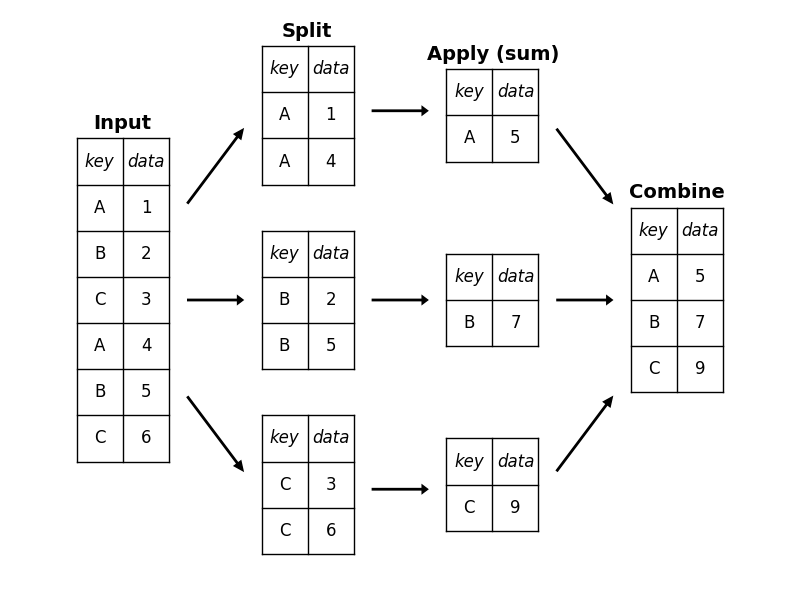

In [35]:
from IPython.display import Image
Image('split_apply_combine.png')

The simplest version of a groupby looks like this, and you can use almost any aggregation function you wish (mean, median, sum, minimum, maximum, standard deviation, count, etc.)

```
<data object>.groupby(<grouping values>).<aggregate>()
```

for example, we can group by gender and find the average of all numerical columns:

In [36]:
data.groupby('gender').count()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,birthyear,tripminutes
gender,,,,,,,,,,,,
Female,34997,34997,34997,34997,34997,34997,34997,34997,34997,34997,34993,34997
Male,135171,135171,135171,135171,135171,135171,135171,135171,135171,135171,135171,135171
Other,3647,3647,3647,3647,3647,3647,3647,3647,3647,3647,3647,3647


In [37]:
data.groupby('gender').mean()

,trip_id,tripduration,birthyear,tripminutes
gender,,,,
Female,145929.823499,697.919834,1978.425056,11.631997
Male,151446.703864,558.367672,1980.282169,9.306128
Other,169321.573348,605.837092,1980.524267,10.097285


It's also possible to indes the grouped object like it is a dataframe:

In [38]:
data.groupby('gender')['tripminutes'].mean()

gender
Female    11.631997
Male       9.306128
Other     10.097285
Name: tripminutes, dtype: float64

You can even group by multiple values: for example we can look at the trip duration by time of day and by gender:

In [39]:
data.groupby([times.hour, 'gender'])['tripminutes'].mean()

starttime  gender
0          Female     9.856338
           Male       8.599553
           Other      8.213818
1          Female     8.479629
           Male       8.811528
           Other     13.765683
2          Female     8.417830
           Male       9.158685
           Other      7.344022
3          Female     7.224982
           Male       7.071405
           Other      5.643350
4          Female     8.424358
           Male      11.371598
           Other      2.810767
5          Female    10.692131
           Male       8.521851
6          Female     9.762105
           Male       7.851311
           Other      9.325292
7          Female    11.510770
           Male       9.186592
           Other      8.093608
8          Female    11.184155
           Male       8.958290
           Other      9.785313
9          Female    10.782919
           Male       8.802831
           Other     10.774822
10         Female    11.780812
                       ...    
14         Female    

The ``unstack()`` operation can help make sense of this type of multiply-grouped data. What this technically does is split a multiple-valued index into an index plus columns:

In [40]:
grouped = data.groupby([times.hour, 'gender'])['tripminutes'].mean().unstack()
grouped

gender,Female,Male,Other
starttime,,,
0,9.856338,8.599553,8.213818
1,8.479629,8.811528,13.765683
2,8.417830,9.158685,7.344022
3,7.224982,7.071405,5.643350
4,8.424358,11.371598,2.810767
5,10.692131,8.521851,NaN
6,9.762105,7.851311,9.325292
7,11.510770,9.186592,8.093608
8,11.184155,8.958290,9.785313


## 5. Visualizing data with ``pandas``

Of course, looking at tables of data is not very intuitive.
Fortunately Pandas has many useful plotting functions built-in, all of which make use of the ``matplotlib`` library to generate plots.

Whenever you do plotting in the IPython notebook, you will want to first run this *magic command* which configures the notebook to work well with plots:

In [41]:
%matplotlib inline

Now we can simply call the ``plot()`` method of any series or dataframe to get a reasonable view of the data:

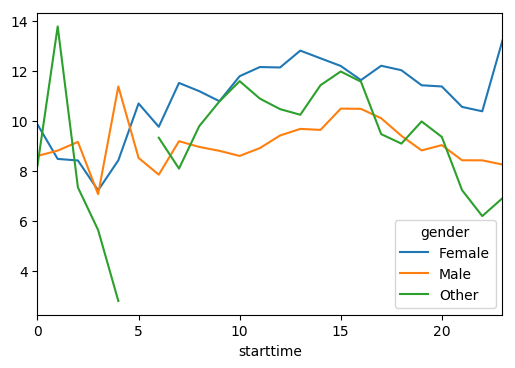

In [42]:
grouped.plot()

### Adjusting the Plot Style

Matplotlib has a number of plot styles you can use. For example, if you like R you might use the ``'ggplot'`` style.
I like the ``'seaborn'`` style:

In [43]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

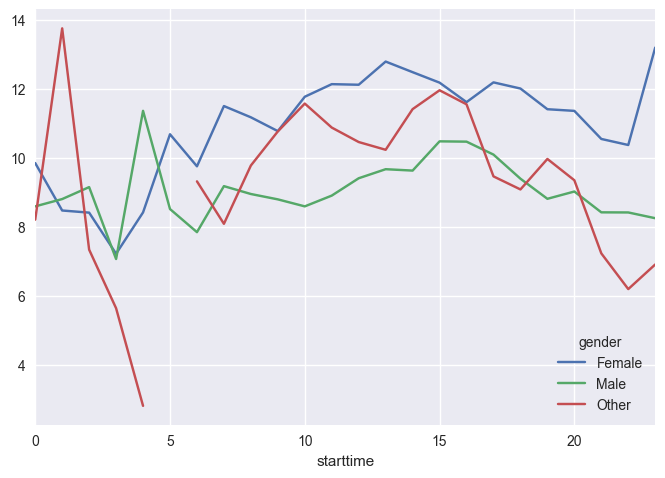

In [44]:
grouped.plot()

### Other plot types

Pandas supports a range of other plotting types; you can find these by using the <TAB> autocomplete on the ``plot`` method:

For example, we can create a histogram of trip durations:

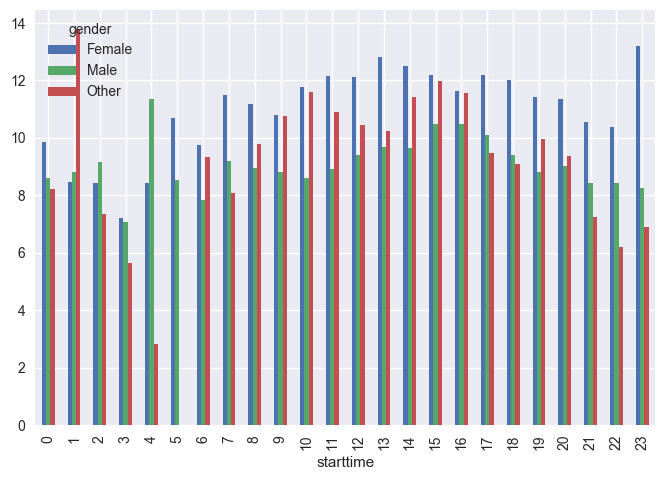

In [45]:
grouped.plot.bar()

If you'd like to adjust the x and y limits of the plot, you can use the ``set_xlim()`` and ``set_ylim()`` method of the resulting object:

(-1, 10)

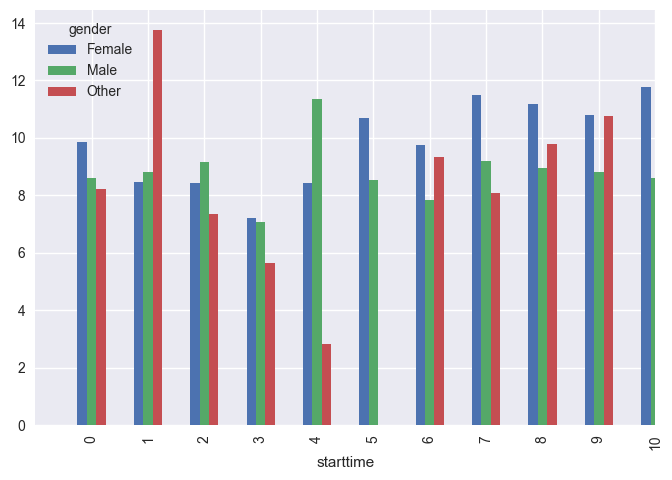

In [46]:
ax = grouped.plot.bar()
ax.set_xlim(-1, 10)

## Breakout: Exploring the Data

Make a plot of the total number of rides as a function of month of the year (You'll need to extract the month, use a ``groupby``, and find the appropriate aggregation to count the number in each group).

In [47]:
data['month'] = times.month

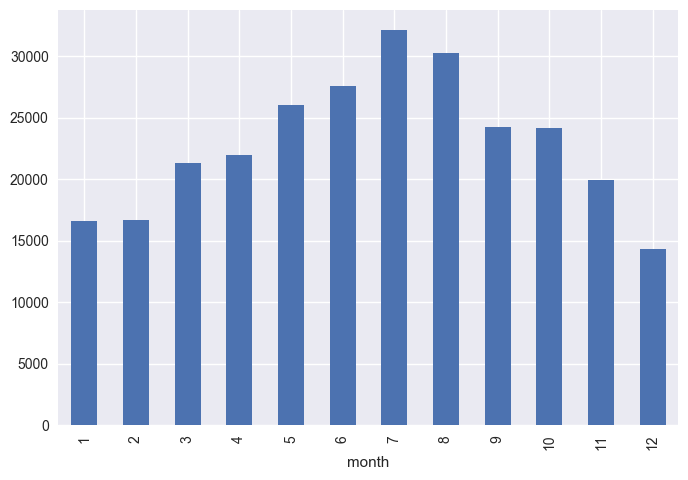

In [48]:
ax = data.groupby('month')['trip_id'].count().plot.bar();

Split this plot by gender. Do you see any seasonal ridership patterns by gender?

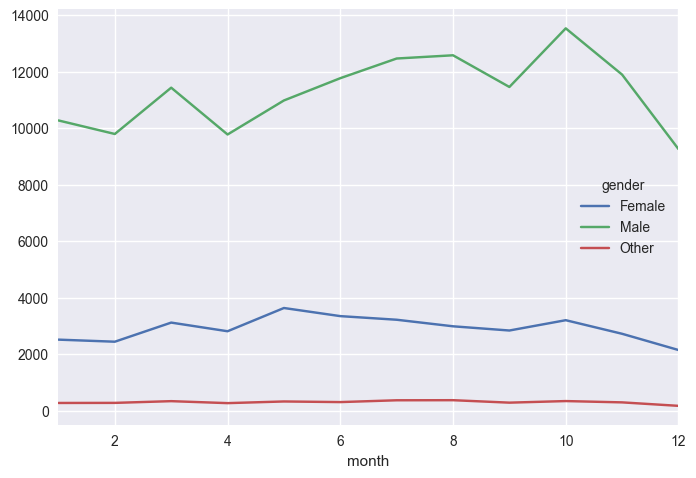

In [49]:
data.groupby(['month','gender'])['trip_id'].count().unstack().plot();

Split this plot by user type. Do you see any seasonal ridership patterns by usertype?

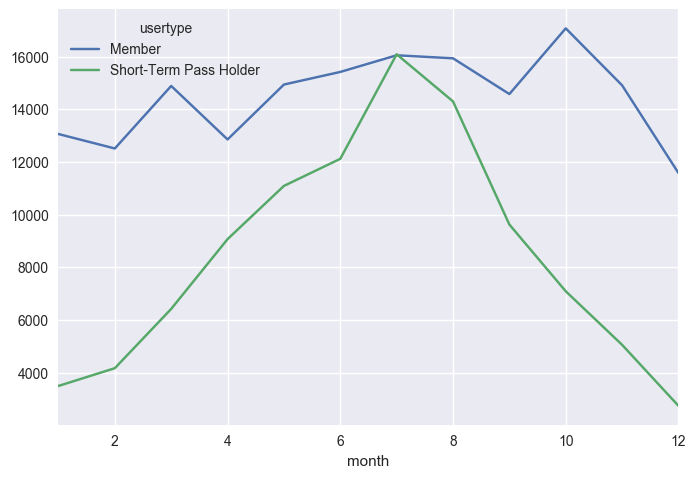

In [50]:
data.groupby(['month','usertype'])['trip_id'].count().unstack().plot();

Repeat the above three steps, counting the number of rides by time of day rather thatn by month.

In [51]:
data['hour'] = times.month

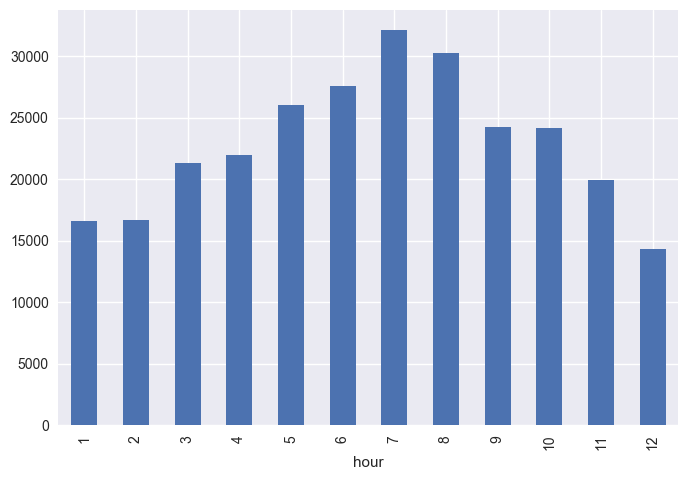

In [52]:
ax = data.groupby('hour')['trip_id'].count().plot.bar();

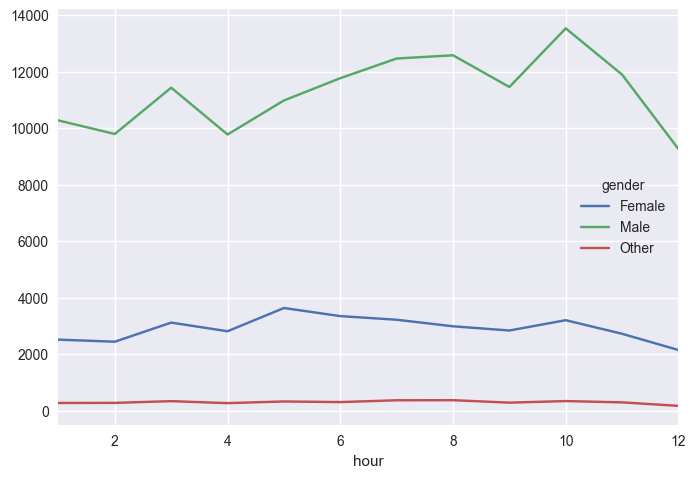

In [53]:
data.groupby(['hour','gender'])['trip_id'].count().unstack().plot();

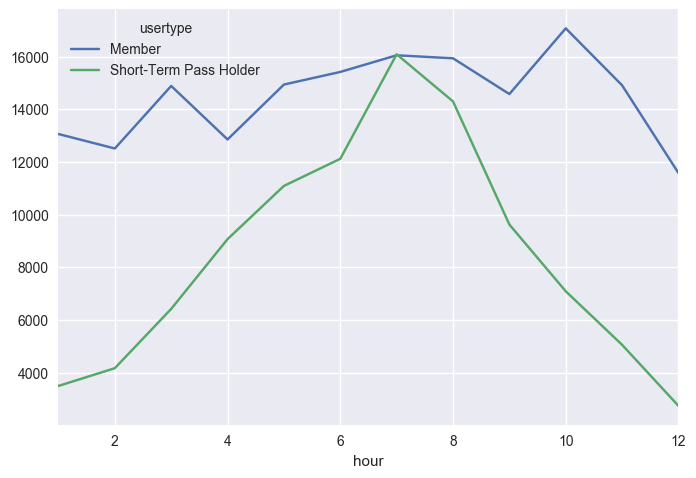

In [54]:
data.groupby(['hour','usertype'])['trip_id'].count().unstack().plot();

Are there any other interesting insights you can discover in the data using these tools?

*A writeup of the analysis that Jake did on the first year of this data, using these same tools, can be found here: http://nbviewer.jupyter.org/github/jakevdp/ProntoData/blob/master/ProntoData.ipynb*

### Looking Forward to Homework

In the [homework this week](https://docs.google.com/document/d/1mxF8YyXCk4EPgfQF6xLXAZM1akhQ0WEg-Rp7Sp_BfYI/edit?usp=sharing), you will have a chance to apply some of these patterns to a brand new (but closely related) dataset.